In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [67]:
H = 7000.
P0 = 1000.
z = 43.e3
p = P0*np.exp(-z/H)
print "p", p

ptop = 2.
ptop = 0.128
ztop = -H*np.log(ptop/P0)
print "ztop", ztop

p 2.148775480909723
ztop 62744.3620583126


qs [0.00059277 0.00065696 0.00072741 0.00080465 0.00088927 0.00098187
 0.00108314 0.00119378 0.00131457 0.00144631]
qsi [0.00039956 0.00044719 0.00050003 0.00055858 0.00062341 0.00069513
 0.00077439 0.00086193 0.00095852 0.00106501]
qs2 [0.00059324 0.00065749 0.000728   0.0008053  0.00088999 0.00098267
 0.00108402 0.00119475 0.00131563 0.00144747]
qs3 [0.00059324 0.00065749 0.000728   0.0008053  0.00088999 0.00098267
 0.00108402 0.00119475 0.00131563 0.00144747]
qs4 [0.00039956 0.00044719 0.00050003 0.00055858 0.00062341 0.00069513
 0.00077439 0.00086193 0.00095852 0.00106501]


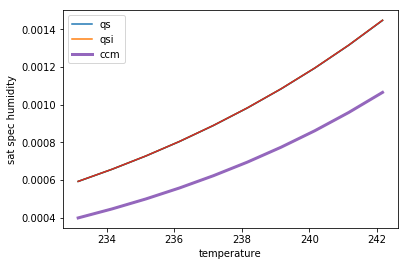

In [52]:
def satshliq(tk,pres):
    """ DOCUMENT satsh(tk,pres)
     return saturation specific humidity over liquid, 
     input temperature (k) and pressure (Pa)
     
     es formula from Modified Clausius Clapyron Equation 
        (0.7%@-40C to 0.006% @ 40C)
     see:
    http://hurri.kean.edu/~yoh/calculations/satvap/satvap.html

     no checking for low pressure or temperature

    """
    eps = .622;    
    omeps = (1.-eps);
    lnes = 53.67957 - 6743.769/tk - 4.8451*np.log(tk)
    es = 100.*np.exp(lnes)
    qs = eps*es/(pres-omeps*es);    
    listb = np.where(pres < omeps*es);
    if len(listb) > 0: qs[listb] = 1.;
    listb = np.where(qs > 1.);
    if len(listb) > 0: qs[listb] = 1.;

    return qs;

t0 = 273.16
t = np.arange(t0-40.,t0-30.,1.)
p = t.copy()
p[:] = 0.2e5
qs = satshliq(t,p)
print "qs", qs
plt.plot(t,qs,label='qs')
plt.ylabel('sat spec humidity')
plt.xlabel('temperature')


def satshice(tk,pres):
    """ DOCUMENT satsh(tk,pres)
     return saturation specific humidity over ice, 
     input temperature (k) and pressure (Pa)
     
     es formula from Modified Clausius Clapyeron Equation 
        (0.14% from -80C to 0C)
     see:
    http://hurri.kean.edu/~yoh/calculations/satvap/satvap.html

     no checking for low pressure or temperature

    """

    eps = .622;    
    omeps = (1.-eps);
    lnes = 23.33086 - 6111.72784/tk + 0.15215*np.log(tk)
    es = 100.*np.exp(lnes)
    qs = eps*es/(pres-omeps*es);    
    list = np.where(pres < omeps*es);
    if len(list) > 0: qs[list] = 1.;
    list = np.where(qs > 1.);
    if len(list) > 0: qs[list] = 1.;

    return qs;

qsi = satshice(t,p)
print "qsi", qsi
plt.plot(t,qsi,label='qsi')



def satsh(tk,pres):
    """ DOCUMENT satsh(tk,pres)
     return saturation specific humidity, 
     input temperature (k) and pressure (Pa)
     
     es formula from Bolton (I think)
     no checking for low pressure or temperature

    """
 
    eps = .622;    
    omeps = (1.-eps);
    es = 100.*np.exp( -6763.6/tk - 4.9283*np.log(tk) + 54.2190 );
    qs = eps*es/(pres-omeps*es);    
    list = np.where(pres < omeps*es);
    if len(list) > 0: qs[list] = 1.;
    list = np.where(qs > 1.);
    if len(list) > 0: qs[list] = 1.;

    return qs;

qs2 = satsh(t,p)
print "qs2", qs2
plt.plot(t,qs2)


def satshccm(tk,pres):
    """ DOCUMENT satsh(tk,pres)
     return saturation specific humidity for ice/liq mixture, 
     using the assumptions of ccm
     input temperature (k) and pressure (Pa)
     
     no checking for low pressure or temperature

    """
 
    qsliq = satshliq(tk, pres);
    qsice = satshice(tk, pres);
    w = (273.15-tk)/20.
#    print "w", w
#    w = np.fmin(np.ones_like(tk),w)
#    w = np.fmax(np.zeros_like(tk),w)
#    wt = 1.-w
    wt = 1. - np.fmax(np.zeros_like(tk),np.fmin(np.ones_like(tk),w))
#    print "wt", wt
    qs = qsliq*wt + qsice*(1.-wt);
    return qs;

qs3 = satsh(t,p)
print "qs3", qs3
plt.plot(t,qs3)


qs4 = satshccm(t,p)
print "qs4", qs4
plt.plot(t,qs4,linewidth=3,label='ccm')

plt.legend()
plt.show()


In [ ]:
# my original yorick codes for reference

func satshliq(tk,pres)
  /* DOCUMENT satsh(tk,pres)
     return saturation specific humidity over liquid, 
     input temperature (k) and pressure (Pa)
     
     es formula from Modified Clausius Clapyron Equation 
        (0.7%@-40C to 0.006% @ 40C)
     see:
    http://hurri.kean.edu/~yoh/calculations/satvap/satvap.html

     no checking for low pressure or temperature

  */
 {
   eps = .622;    
   omeps = (1.-eps);
   lnes = 53.67957 - 6743.769/tk - 4.8451*log(tk)
   es = 100.*exp(lnes)
   qs = eps*es/(pres-omeps*es);    
   list = where(pres < omeps*es);
   if (numberof(list) > 0) qs(list) = 1.;
   list = where(qs > 1.);
   if (numberof(list) > 0) qs(list) = 1.;

   return qs;
}


func satshice(tk,pres)
  /* DOCUMENT satsh(tk,pres)
     return saturation specific humidity over ice, 
     input temperature (k) and pressure (Pa)
     
     es formula from Modified Clausius Clapyeron Equation 
        (0.14% from -80C to 0C)
     see:
    http://hurri.kean.edu/~yoh/calculations/satvap/satvap.html

     no checking for low pressure or temperature

  */
 {
   eps = .622;    
   omeps = (1.-eps);
   lnes = 23.33086 - 6111.72784/tk + 0.15215*log(tk)
   es = 100.*exp(lnes)
   qs = eps*es/(pres-omeps*es);    
   list = where(pres < omeps*es);
   if (numberof(list) > 0) qs(list) = 1.;
   list = where(qs > 1.);
   if (numberof(list) > 0) qs(list) = 1.;

   return qs;
}
func satsh(tk,pres)
  /* DOCUMENT satsh(tk,pres)
     return saturation specific humidity, 
     input temperature (k) and pressure (Pa)
     
     es formula from Bolton (I think)
     no checking for low pressure or temperature

  */
 {
   eps = .622;    
   omeps = (1.-eps);
   es = 100.*exp( -6763.6/tk - 4.9283*log(tk) + 54.2190 );
   qs = eps*es/(pres-omeps*es);    
   list = where(pres < omeps*es);
   if (numberof(list) > 0) qs(list) = 1.;
   list = where(qs > 1.);
   if (numberof(list) > 0) qs(list) = 1.;

   return qs;
}

func satshccm(tk,pres)
  /* DOCUMENT satsh(tk,pres)
     return saturation specific humidity for ice/liq mixture, 
     using the assumptions of ccm
     input temperature (k) and pressure (Pa)
     
     no checking for low pressure or temperature

  */
 {
   qsliq = satshliq(tk, pres);
   qsice = satshice(tk, pres);
   wt = 1.-max(0.,min(1.,(273.15-tk)/20.));
   qs = qsliq*wt + qsice*(1.-wt);
   return qs;
}
